In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning')
import os
import pandas as pd
from utils.functions import modelo_classificacao_tf
import yaml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.4f}'.format)

yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [2]:
from keras.utils import to_categorical

In [3]:
params = {        
        'X_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_train']),
        'y_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_train']),
        'X_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_val'],
            ),
        'y_val_feat_sel': os.path.join(
             config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_val']),      
        'epochs': 30 
        }
    

In [4]:
X_train = pd.read_parquet(params['X_train_feat_sel'])
y_train = pd.read_parquet(params['y_train_feat_sel'])
y_train = to_categorical(y_train)

In [5]:
X_val = pd.read_parquet(params['X_val_feat_sel'])
y_val = pd.read_parquet(params['y_val_feat_sel'])
y_val = to_categorical(y_val)

In [6]:
# Criar o modelo
input_dim = X_train.shape[1]
model = modelo_classificacao_tf(input_dim)          
model.compile(
    optimizer='adam',         
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
    )   

In [7]:
print("train model")     
# O treinamento deve usar os dados escalonados
history = model.fit(
    X_train,
    y_train,
    epochs=params['epochs'],  # Número de épocas
    batch_size=32,
    validation_split=0.1,  # Usar 10% do treino para validação interna
    verbose=2  # Silencia a saída para o modo de produção
)

train model
Epoch 1/30
19/19 - 2s - 91ms/step - accuracy: 0.6273 - loss: 0.6807 - precision: 0.7500 - recall: 0.0150 - val_accuracy: 0.6866 - val_loss: 0.6720 - val_precision: 0.7273 - val_recall: 0.1194
Epoch 2/30
19/19 - 0s - 5ms/step - accuracy: 0.7371 - loss: 0.6526 - precision: 0.7966 - recall: 0.3910 - val_accuracy: 0.7015 - val_loss: 0.6475 - val_precision: 0.7500 - val_recall: 0.4478
Epoch 3/30
19/19 - 0s - 5ms/step - accuracy: 0.7587 - loss: 0.6208 - precision: 0.8115 - recall: 0.5158 - val_accuracy: 0.7015 - val_loss: 0.6117 - val_precision: 0.7561 - val_recall: 0.4627
Epoch 4/30
19/19 - 0s - 5ms/step - accuracy: 0.7804 - loss: 0.5777 - precision: 0.8252 - recall: 0.5657 - val_accuracy: 0.7313 - val_loss: 0.5584 - val_precision: 0.7925 - val_recall: 0.6269
Epoch 5/30
19/19 - 0s - 5ms/step - accuracy: 0.8020 - loss: 0.5232 - precision: 0.8314 - recall: 0.7055 - val_accuracy: 0.7910 - val_loss: 0.4825 - val_precision: 0.8361 - val_recall: 0.7612
Epoch 6/30
19/19 - 0s - 5ms/step

Treinamento concluído!


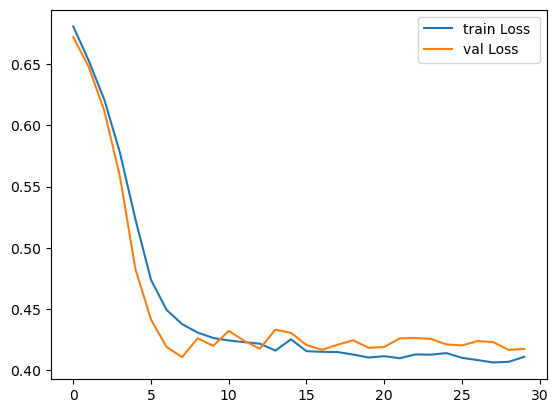

In [8]:
print("Treinamento concluído!")    
plt.plot(history.history['loss'], label='train Loss ')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()

In [9]:
print("\n### loss metrics ###")
loss, accuracy_train, preciison_train, recall_train = model.evaluate(X_train, y_train, verbose=0)
print(f"loss train: {loss:.2f}")
print(f"acc train: {accuracy_train:.2f}") 
print(f"prec train: {preciison_train:.2f}") 
print(f"recall train: {recall_train:.2f}")     


### loss metrics ###
loss train: 0.40
acc train: 0.83
prec train: 0.84
recall train: 0.81


In [10]:
print("\n### loss metrics ###")
loss, accuracy_train, preciison_train, recall_train = model.evaluate(X_val, y_val, verbose=0)
print(f"loss train: {loss:.2f}")
print(f"acc train: {accuracy_train:.2f}") 
print(f"prec train: {preciison_train:.2f}") 
print(f"recall train: {recall_train:.2f}")     


### loss metrics ###
loss train: 0.45
acc train: 0.79
prec train: 0.82
recall train: 0.77
